# Bitly Data from 1.USA.gov

## 1. ĐỊNH NGHĨA VẤN ĐỀ

**Mô tả:**
+ Bộ dữ liệu Bitly Data from 1.USA.gov được thu thập thông qua dịch vụ rút gọn liên kết Bitly, kết hợp cùng website chính phủ USA.gov vào năm 2011.
+ Mỗi dòng dữ liệu (bản ghi) thể hiện một lượt truy cập (click) của người dùng Internet vào một đường liên kết có đuôi .gov hoặc .mil, vốn được rút gọn thông qua Bitly.
+ Mỗi bản ghi được lưu ở định dạng JSON (JavaScript Object Notation), bao gồm nhiều trường thông tin như:
    + Múi giờ truy cập (tz),
    + Quốc gia (c),
    + Chuỗi User-Agent mô tả trình duyệt và hệ điều hành (a),
    + Nguồn truy cập referrer (r – ví dụ Facebook, Twitter, Google),
    + Thời điểm click (t),
    + Tọa độ địa lý (ll), v.v.
+ Dữ liệu phản ánh hành vi của hàng nghìn người dùng trên khắp thế giới khi họ truy cập các website chính phủ Hoa Kỳ thông qua mạng Internet.

**Dữ liệu đầu vào ban đầu (các trường chính):**
+ tz – Múi giờ người dùng (ví dụ: America/New_York, Europe/London, …)
+ c – Quốc gia (mã quốc gia 2 ký tự, ví dụ US, BR, PL, …)
+ a – Chuỗi User-Agent (mô tả trình duyệt và hệ điều hành)
+ r – Nguồn referrer (nơi người dùng click vào link Bitly, ví dụ facebook.com, google.com)
+ t, hc – Thời điểm click và thời điểm tạo link (UNIX timestamp)
+ cy, gr – Thành phố và bang (nếu người dùng ở Mỹ)

**Dữ liệu đầu ra mong đợi (Insights):**
+ Tập dữ liệu không có sẵn một cột “đầu ra” cố định; thay vào đó, việc phân tích nhằm tạo ra các kết quả (insights) thông qua các câu hỏi nghiên cứu như:
    + Phân bố người dùng theo múi giờ, quốc gia, thành phố hoặc bang.
    + Tỷ lệ sử dụng hệ điều hành (Windows, Mac, Android, iOS, Linux).
    + Nguồn truy cập (referrer) phổ biến nhất: Facebook, Twitter, Google, LinkedIn,…
    + Khung giờ hoạt động cao nhất trong ngày (phân tích theo timestamp t).
    + Tỷ lệ người dùng ngoài Hoa Kỳ (so với tổng thể).
    + Mối quan hệ giữa hệ điều hành, múi giờ và nguồn truy cập.
    + Xu hướng hành vi thời gian – phân tích giờ, ngày, tuần của lượt click.

**Mục tiêu của phân tích:**
+ Hiểu hành vi người dùng Internet khi truy cập các trang web chính phủ Mỹ.
+ Xác định sự khác biệt về địa lý, thời gian và thiết bị trong hành vi truy cập.
+ Minh họa quy trình phân tích dữ liệu JSON thực tế bằng Python và Pandas:
+ Đọc – Làm sạch – Chuẩn hóa – Tổng hợp – Trực quan hóa – Kết luận.
+ Cung cấp cái nhìn định lượng về hành vi trực tuyến đối với các nguồn thông tin công cộng (.gov / .mil).

+ a	string	Chuỗi User-Agent (trình duyệt, OS)
+ c	string	Quốc gia (US, BR, PL, …)
+ tz	string	Múi giờ (America/New_York, Europe/London, …)
+ cy	string	Thành phố
+ gr	string	Bang hoặc vùng (Mỹ)
+ r	string	Referrer – nguồn người dùng đến từ (Facebook, Google, v.v.)
+ u	string	URL đích (.gov, .mil)
+ t	int	Thời điểm click (timestamp)
+ hc	int	Thời điểm tạo link (timestamp)
+ ll	list	Tọa độ [vĩ độ, kinh độ]
+ nk, g, h, l	string	Mã rút gọn nội bộ của Bitly
+ _heartbeat_, kw	optional	Dữ liệu hệ thống

## 2. ĐỌC & KHÁM PHÁ DỮ LIỆU

In [3]:
# 1. Import thư viện
import json
import pandas as pd


# 2. Đọc file JSON dòng (line-by-line JSON)
path = "datasets/example.txt"
# Mỗi dòng trong file là 1 bản ghi JSON
with open(path) as f:
    records = [json.loads(line) for line in f]
#json.loads() chuyển chuỗi JSON → dict (từ điển Python).
#records là một list chứa hàng nghìn dict.


# 3. Kiểm tra tổng số bản ghi & 1 mẫu đầu tiên
print("Tổng số bản ghi:", len(records))
print("1 mẫu bản ghi:")
print(records[0])

Tổng số bản ghi: 3560
1 mẫu bản ghi:
{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11', 'c': 'US', 'nk': 1, 'tz': 'America/New_York', 'gr': 'MA', 'g': 'A6qOVH', 'h': 'wfLQtf', 'l': 'orofrog', 'al': 'en-US,en;q=0.8', 'hh': '1.usa.gov', 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf', 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991', 't': 1331923247, 'hc': 1331822918, 'cy': 'Danvers', 'll': [42.576698, -70.954903]}


In [4]:
# 4. Chuyển list → DataFrame (pandas)
frame = pd.DataFrame(records)
frame.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [5]:
# 5. Kiểm tra thông tin tổng quát của bảng
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

Ý nghĩa:
    * Số dòng (entries)
    * Tên các cột
    * Số lượng giá trị không null trong mỗi cột
    * Kiểu dữ liệu (object, float64, …)

In [7]:
# 6. Kiểm tra tên các cột
print(frame.columns.tolist())

['a', 'c', 'nk', 'tz', 'gr', 'g', 'h', 'l', 'al', 'hh', 'r', 'u', 't', 'hc', 'cy', 'll', '_heartbeat_', 'kw']


In [8]:
# 7. Kiểm tra dữ liệu thiếu (NaN)
frame.isna().sum().sort_values(ascending=False).head(10)

kw             3467
_heartbeat_    3440
ll              641
c               641
gr              641
cy              641
al              466
a               120
tz              120
nk              120
dtype: int64

In [9]:
# 8. Xem vài giá trị đặc trưng
# Cột múi giờ
frame["tz"].head(10)

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [10]:
# Cột quốc gia
frame["c"].value_counts().head()

c
US    2305
GB      74
CA      60
ES      37
JP      37
Name: count, dtype: int64

In [11]:
# Cột referrer
frame["r"].head(5)

0    http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...
1                             http://www.AwareMap.com/
2                                 http://t.co/03elZC4Q
3                                               direct
4                  http://www.shrewsbury-ma.gov/selco/
Name: r, dtype: object

## 3. LÀM SẠCH DỮ LIỆU

In [12]:
# 1. Làm sạch cột tz (Time Zone)
# Cột tz chứa thông tin múi giờ, nhưng có thể: bị thiếu (NaN); hoặc là chuỗi rỗng ("")
# Thay giá trị thiếu bằng "Missing"
clean_tz = frame["tz"].fillna("Missing")

# Thay chuỗi rỗng bằng "Unknown"
clean_tz[clean_tz == ""] = "Unknown"

# Gán lại vào DataFrame
frame["clean_tz"] = clean_tz

# Xem 10 giá trị đầu
frame["clean_tz"].head(10)


0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7              Unknown
8              Unknown
9              Unknown
Name: clean_tz, dtype: object

**Kết quả:**
  + Các bản ghi giờ sẽ có 3 loại:
      + “America/New_York” (có thật)
      + “Unknown” (chuỗi trống)
      + “Missing” (không có trường tz)

In [13]:
# 2. Làm sạch cột c (Country code)
frame["c"] = frame["c"].fillna("Missing")
frame["c"].replace("", "Unknown", inplace=True)

# Kiểm tra top quốc gia
frame["c"].value_counts().head(10)

C:\Users\PC\AppData\Local\Temp\ipykernel_18136\3223551977.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  frame["c"].replace("", "Unknown", inplace=True)


c
US         2305
Missing     641
GB           74
CA           60
ES           37
JP           37
BR           35
DE           28
IT           27
NL           22
Name: count, dtype: int64

Thông thường US chiếm đa số, các quốc gia khác chỉ chiếm tỉ lệ nhỏ.

In [14]:
# 3. Làm sạch cột r (Referrer)
# Referrer là nguồn người dùng đến từ đâu (facebook, twitter, google, v.v.)
frame["r"] = frame["r"].fillna("Missing")
frame["r"].replace("", "Unknown", inplace=True)

# Xem 5 dòng đầu
frame["r"].head()

C:\Users\PC\AppData\Local\Temp\ipykernel_18136\3080594051.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  frame["r"].replace("", "Unknown", inplace=True)


0    http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...
1                             http://www.AwareMap.com/
2                                 http://t.co/03elZC4Q
3                                               direct
4                  http://www.shrewsbury-ma.gov/selco/
Name: r, dtype: object

In [15]:
# 4. Tạo cột os – xác định hệ điều hành
# Cột a (User-Agent) chứa thông tin trình duyệt & hệ điều hành
import numpy as np

# Lọc bỏ dòng thiếu 'a'
cframe = frame[frame["a"].notna()].copy()

# Gán hệ điều hành
def detect_os(agent):
    if "Windows" in agent:
        return "Windows"
    elif "Macintosh" in agent or "Mac OS" in agent:
        return "Mac"
    elif "Android" in agent:
        return "Android"
    elif "Linux" in agent:
        return "Linux"
    elif "iPhone" in agent or "iPad" in agent:
        return "iOS"
    else:
        return "Other"

cframe["os"] = cframe["a"].apply(detect_os)

# Xem thống kê
cframe["os"].value_counts()

os
Windows    2246
Mac         771
Other       256
Android     131
Linux        36
Name: count, dtype: int64

In [16]:
# 5. Tạo cột ref_source – xác định nguồn truy cập chính
# Từ r (referrer URL), ta tách ra tên miền chính.
def detect_referrer(url):
    if "facebook" in url.lower():
        return "Facebook"
    elif "twitter" in url.lower():
        return "Twitter"
    elif "google" in url.lower():
        return "Google"
    elif "t.co" in url.lower():
        return "Twitter"
    elif "linkedin" in url.lower():
        return "LinkedIn"
    elif "bing" in url.lower():
        return "Bing"
    elif url == "Missing":
        return "Missing"
    elif url == "Unknown":
        return "Unknown"
    else:
        return "Other"

cframe["ref_source"] = cframe["r"].apply(detect_referrer)

cframe["ref_source"].value_counts()

ref_source
Other       2133
Twitter      708
Facebook     548
Google        47
LinkedIn       4
Name: count, dtype: int64

In [17]:
# 6. Kiểm tra dữ liệu sau khi làm sạch
cframe.info()
cframe.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 3440 entries, 0 to 3559
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            3440 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  0 non-null      float64
 17  kw           93 non-null     object 
 18  clean_tz     3440 non-null   object 
 19  os         

,a,c,nk,tz,gr,g,h,l,al,hh,...,u,t,hc,cy,ll,_heartbeat_,kw,clean_tz,os,ref_source
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN,America/New_York,Windows,Facebook
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,...,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN,America/Denver,Other,Other
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,...,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN,America/New_York,Windows,Twitter
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,...,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN,America/Sao_Paulo,Mac,Other
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,...,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN,America/New_York,Windows,Other


## 4. PHÂN TÍCH MÔ TẢ

In [18]:
# 1. Phân bố người dùng theo múi giờ (tz)
import seaborn as sns
import matplotlib.pyplot as plt

# Đếm số lượt truy cập theo múi giờ
tz_counts = cframe["clean_tz"].value_counts().head(10)
print(tz_counts)

clean_tz
America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: count, dtype: int64


C:\Users\PC\AppData\Local\Temp\ipykernel_18136\4153647666.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=tz_counts.index, x=tz_counts.values, palette="viridis")


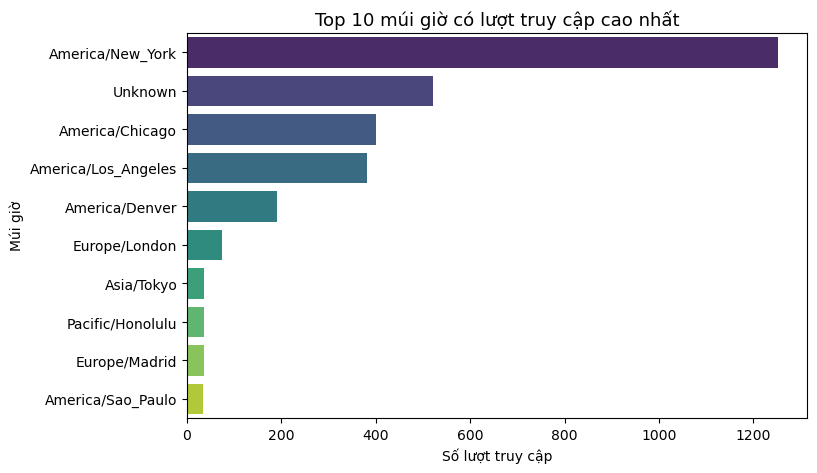

In [19]:
# 2. Biểu đồ top 10 múi giờ
plt.figure(figsize=(8,5))
sns.barplot(y=tz_counts.index, x=tz_counts.values, palette="viridis")
plt.title("Top 10 múi giờ có lượt truy cập cao nhất", fontsize=13)
plt.xlabel("Số lượt truy cập")
plt.ylabel("Múi giờ")
plt.show()

Biểu đồ thanh ngang, hiển thị rõ khu vực hoạt động mạnh nhất (New York, Chicago, Los Angeles…).

In [20]:
# 3. Phân bố người dùng theo quốc gia (c)
country_counts = cframe["c"].value_counts().head(10)
print(country_counts)

c
US         2305
Missing     521
GB           74
CA           60
ES           37
JP           37
BR           35
DE           28
IT           27
NL           22
Name: count, dtype: int64


C:\Users\PC\AppData\Local\Temp\ipykernel_18136\2460020505.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=country_counts.index, x=country_counts.values, palette="coolwarm")


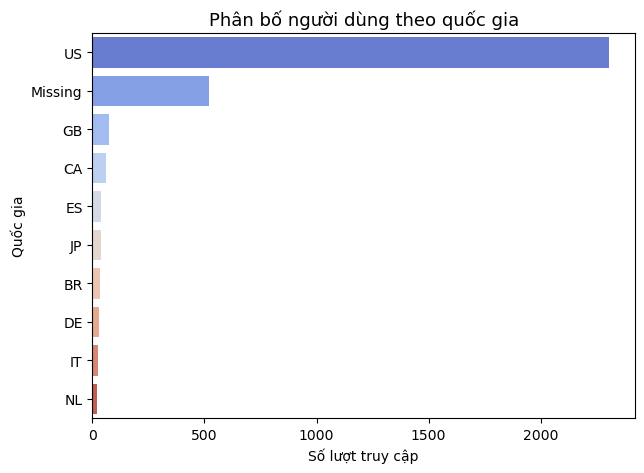

In [21]:
# 4. Biểu đồ phân bố quốc gia
plt.figure(figsize=(7,5))
sns.barplot(y=country_counts.index, x=country_counts.values, palette="coolwarm")
plt.title("Phân bố người dùng theo quốc gia", fontsize=13)
plt.xlabel("Số lượt truy cập")
plt.ylabel("Quốc gia")
plt.show()

Kết quả: người dùng đến từ Mỹ chiếm đa số (>80%).

In [22]:
# 5. Phân bố người dùng theo hệ điều hành (os)
os_counts = cframe["os"].value_counts()
print(os_counts)

os
Windows    2246
Mac         771
Other       256
Android     131
Linux        36
Name: count, dtype: int64


C:\Users\PC\AppData\Local\Temp\ipykernel_18136\1121477461.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=os_counts.values, y=os_counts.index, palette="mako")


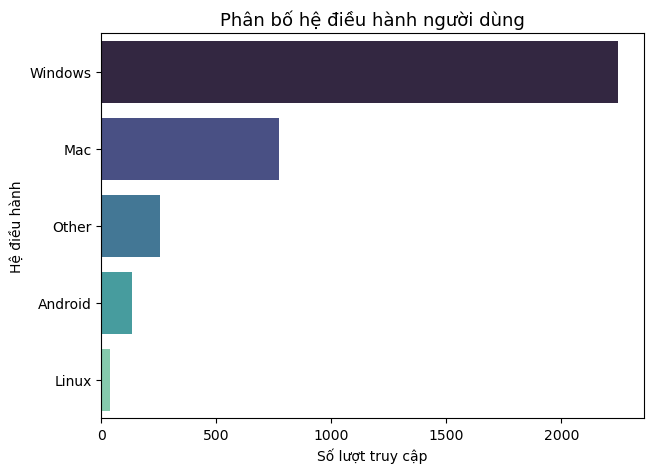

In [23]:
# 6. Biểu đồ hệ điều hành
plt.figure(figsize=(7,5))
sns.barplot(x=os_counts.values, y=os_counts.index, palette="mako")
plt.title("Phân bố hệ điều hành người dùng", fontsize=13)
plt.xlabel("Số lượt truy cập")
plt.ylabel("Hệ điều hành")
plt.show()

Windows chiếm phần lớn người dùng (đa số truy cập từ máy tính).

In [24]:
# 7. Phân bố nguồn truy cập (referrer)
ref_counts = cframe["ref_source"].value_counts().head(10)
print(ref_counts)

ref_source
Other       2133
Twitter      708
Facebook     548
Google        47
LinkedIn       4
Name: count, dtype: int64


C:\Users\PC\AppData\Local\Temp\ipykernel_18136\1509441702.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=ref_counts.index, x=ref_counts.values, palette="crest")


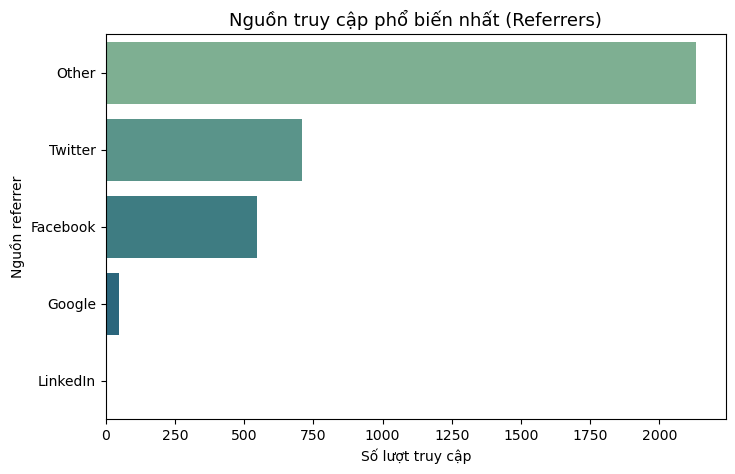

In [25]:
# 8. Biểu đồ referrer
plt.figure(figsize=(8,5))
sns.barplot(y=ref_counts.index, x=ref_counts.values, palette="crest")
plt.title("Nguồn truy cập phổ biến nhất (Referrers)", fontsize=13)
plt.xlabel("Số lượt truy cập")
plt.ylabel("Nguồn referrer")
plt.show()

Facebook là nguồn chia sẻ chính cho các link .gov / .mil, theo sau là Google và Twitter.

## 5. PHÂN TÍCH TƯƠNG QUAN

In [26]:
# 1. Phân bố hệ điều hành theo múi giờ
# Mục tiêu: Xem người dùng Windows và Non-Windows khác nhau như thế nào ở từng múi giờ.
# Chúng ta nhóm lại thành hai loại: “Windows”; “Non-Windows” (gồm Mac, Linux, Android, iOS, …)
cframe["os_group"] = np.where(cframe["os"] == "Windows", "Windows", "Non-Windows")

# Gom nhóm theo tz và os_group
by_tz_os = cframe.groupby(["clean_tz", "os_group"])
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head()

os_group,Non-Windows,Windows
clean_tz,,
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0


In [27]:
# 2. Chọn ra 10 múi giờ có tổng truy cập cao nhất
top_tz = agg_counts.sum(axis="columns").nlargest(10)
count_subset = agg_counts.loc[top_tz.index]
count_subset

os_group,Non-Windows,Windows
clean_tz,,
America/New_York,339.0,912.0
Unknown,245.0,276.0
America/Chicago,115.0,285.0
America/Los_Angeles,130.0,252.0
America/Denver,132.0,59.0
Europe/London,43.0,31.0
Asia/Tokyo,2.0,35.0
Pacific/Honolulu,0.0,36.0
Europe/Madrid,16.0,19.0


Giúp ta tập trung vào những khu vực có đủ dữ liệu đáng kể.

<Figure size 800x600 with 0 Axes>

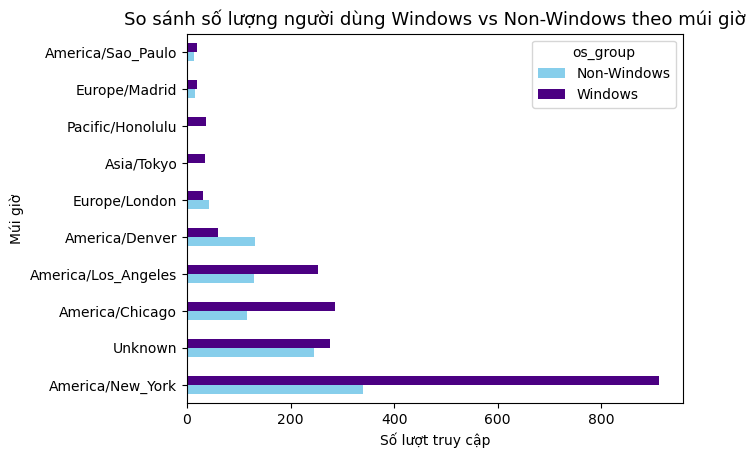

In [28]:
# Biểu đồ so sánh Windows vs Non-Windows
plt.figure(figsize=(8,6))
count_subset.plot(kind="barh", stacked=False, color=["#87CEEB", "#4B0082"])
plt.title("So sánh số lượng người dùng Windows vs Non-Windows theo múi giờ", fontsize=13)
plt.xlabel("Số lượt truy cập")
plt.ylabel("Múi giờ")
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_18136\2781872287.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = count_subset2.groupby("tz").apply(


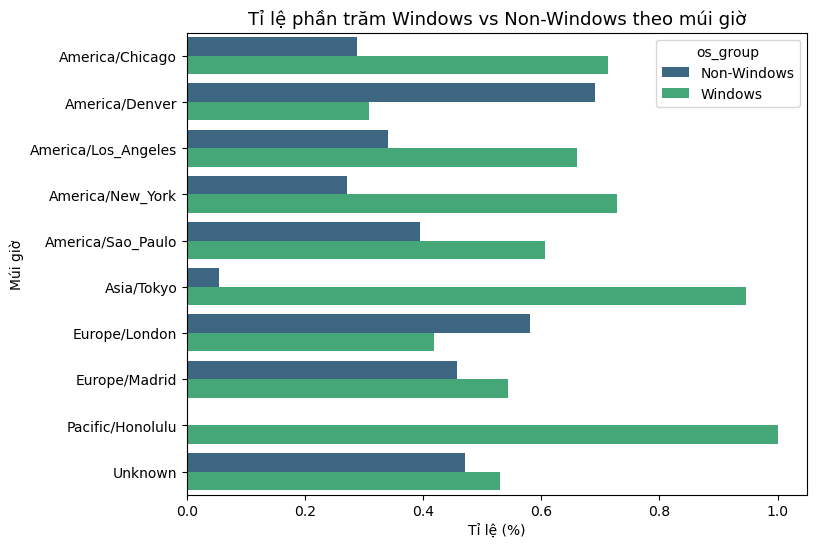

In [29]:
# Chuẩn hóa theo tỉ lệ (%)
# Để so sánh công bằng (vì mỗi múi giờ có số lượng khác nhau), ta chuẩn hóa phần trăm người dùng Windows / Non-Windows trong từng múi giờ.
def norm_total(group):
    group["normed_total"] = group["total"] / group["total"].sum()
    return group

# Chuẩn bị lại dữ liệu cho seaborn
count_subset2 = count_subset.stack().reset_index()
count_subset2.columns = ["tz", "os_group", "total"]

# Chuẩn hóa
results = count_subset2.groupby("tz").apply(
    lambda g: g.assign(normed_total=g["total"]/g["total"].sum())
)

# Biểu đồ tỉ lệ phần trăm
plt.figure(figsize=(8,6))
sns.barplot(x="normed_total", y="tz", hue="os_group", data=results, palette="viridis")
plt.title("Tỉ lệ phần trăm Windows vs Non-Windows theo múi giờ", fontsize=13)
plt.xlabel("Tỉ lệ (%)")
plt.ylabel("Múi giờ")
plt.show()

**Nhận xét:**
+ Ở Mỹ (New York, Chicago): Windows chiếm ~70–80%
+ Ở châu Âu, tỉ lệ Non-Windows (Mac/Linux) cao hơn
+ Gợi ý: hành vi sử dụng máy tính khác nhau theo khu vực địa lý

In [30]:
# 3. So sánh referrer theo hệ điều hành
# Mục tiêu: Xem người dùng đến từ đâu (Facebook, Google, Twitter, …) và có khác biệt giữa Windows / Non-Windows không?
ref_os = cframe.groupby(["ref_source", "os_group"]).size().unstack().fillna(0)
ref_os["total"] = ref_os.sum(axis=1)
ref_os = ref_os.sort_values(by="total", ascending=False).head(8)
ref_os

os_group,Non-Windows,Windows,total
ref_source,,,
Other,670.0,1463.0,2133.0
Twitter,357.0,351.0,708.0
Facebook,152.0,396.0,548.0
Google,15.0,32.0,47.0
LinkedIn,0.0,4.0,4.0


<Figure size 800x500 with 0 Axes>

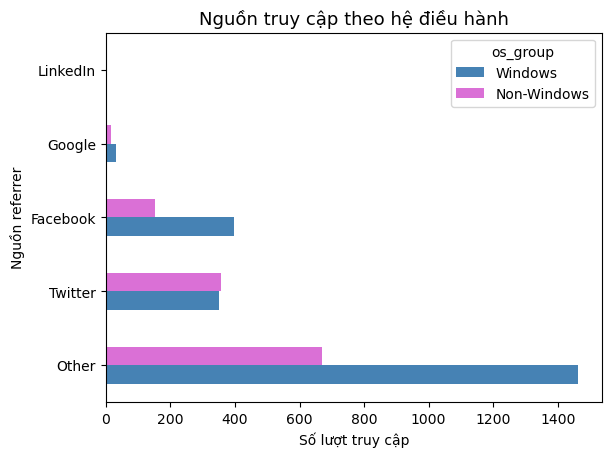

In [31]:
# Biểu đồ
plt.figure(figsize=(8,5))
ref_os[["Windows", "Non-Windows"]].plot(
    kind="barh", stacked=False, color=["#4682B4", "#DA70D6"]
)
plt.title("Nguồn truy cập theo hệ điều hành", fontsize=13)
plt.xlabel("Số lượt truy cập")
plt.ylabel("Nguồn referrer")
plt.show()

**Nhận xét:**
+ Facebook và Google chiếm phần lớn nguồn traffic.
+ Windows → nhiều click từ Facebook / Google.
+ Non-Windows → tỉ lệ cao hơn ở Twitter, LinkedIn.

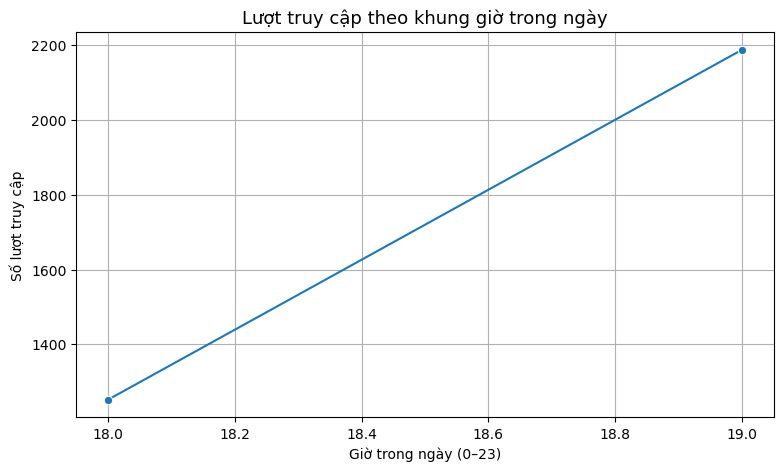

In [33]:
# 4. Phân tích khung giờ hoạt động
# Cột t là timestamp (Unix time) → chuyển sang giờ và ngày thực.
import datetime

# Chuyển timestamp thành datetime
cframe["click_time"] = pd.to_datetime(cframe["t"], unit="s")

# Tạo cột giờ và ngày
cframe["hour"] = cframe["click_time"].dt.hour
cframe["date"] = cframe["click_time"].dt.date

# Thống kê số lượt click theo giờ
hourly_counts = cframe["hour"].value_counts().sort_index()
plt.figure(figsize=(9,5))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker="o")
plt.title("Lượt truy cập theo khung giờ trong ngày", fontsize=13)
plt.xlabel("Giờ trong ngày (0–23)")
plt.ylabel("Số lượt truy cập")
plt.grid(True)
plt.show()

**Nhận xét:**
+ Lượng truy cập cao vào giờ hành chính (8–17h).
+ Giảm mạnh vào đêm → đúng hành vi người dùng Internet thông thường.

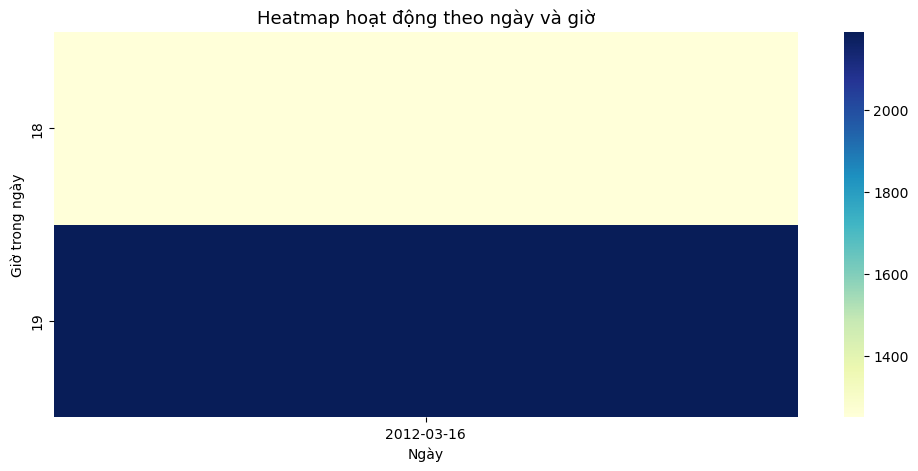

In [34]:
# 5. Heatmap hoạt động (giờ vs ngày)
heat = cframe.pivot_table(index="hour", columns="date", values="u", aggfunc="count")
plt.figure(figsize=(12,5))
sns.heatmap(heat, cmap="YlGnBu")
plt.title("Heatmap hoạt động theo ngày và giờ", fontsize=13)
plt.xlabel("Ngày")
plt.ylabel("Giờ trong ngày")
plt.show()

## 6. PHÂN TÍCH ĐỊA LÝ

In [35]:
# 1. Thống kê phân bố người dùng theo bang (gr)
# Cột gr (state code) chỉ tồn tại cho người dùng ở Mỹ.
state_counts = cframe["gr"].value_counts().head(10)
print(state_counts)

gr
CA    279
NY    204
TX    140
UT    133
MA    121
FL    118
GA    108
VA    108
DC     98
MD     95
Name: count, dtype: int64


C:\Users\PC\AppData\Local\Temp\ipykernel_18136\1097377539.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=state_counts.index, x=state_counts.values, palette="YlGn")


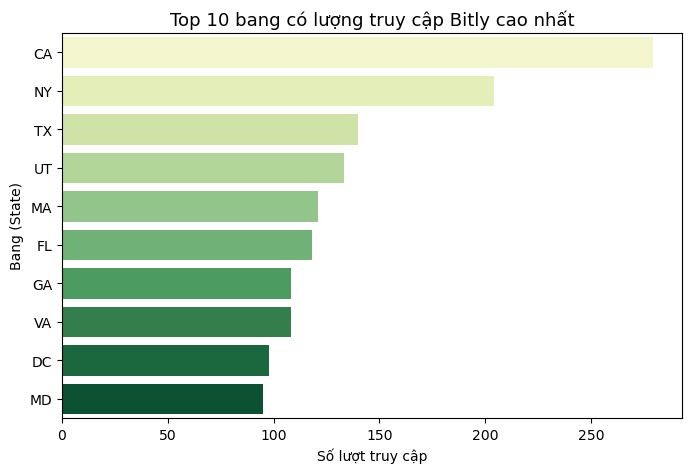

In [36]:
# Biểu đồ bang có lượng truy cập cao nhất
plt.figure(figsize=(8,5))
sns.barplot(y=state_counts.index, x=state_counts.values, palette="YlGn")
plt.title("Top 10 bang có lượng truy cập Bitly cao nhất", fontsize=13)
plt.xlabel("Số lượt truy cập")
plt.ylabel("Bang (State)")
plt.show()

California, New York, Texas dẫn đầu → đây là các bang có dân số và hoạt động Internet lớn nhất nước Mỹ.

In [37]:
# 2. Thống kê phân bố người dùng theo thành phố (cy)
city_counts = cframe["cy"].value_counts().head(10)
print(city_counts)

cy
Provo           121
White Plains    104
Washington       98
Palo Alto        68
Shrewsbury       46
Acworth          38
Dallas           33
Paramus          32
Nogata           29
Los Angeles      28
Name: count, dtype: int64


C:\Users\PC\AppData\Local\Temp\ipykernel_18136\1882081772.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=city_counts.index, x=city_counts.values, palette="coolwarm")


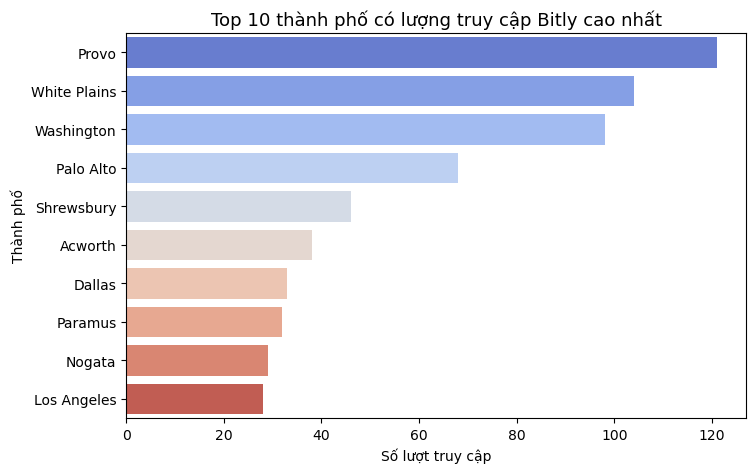

In [38]:
# Biểu đồ top 10 thành phố
plt.figure(figsize=(8,5))
sns.barplot(y=city_counts.index, x=city_counts.values, palette="coolwarm")
plt.title("Top 10 thành phố có lượng truy cập Bitly cao nhất", fontsize=13)
plt.xlabel("Số lượt truy cập")
plt.ylabel("Thành phố")
plt.show()

Các trung tâm lớn như New York, Los Angeles, Chicago thống trị lượt click → phản ánh mức độ tập trung dân cư & truy cập Internet.

In [39]:
# 3. Tỷ lệ người dùng ngoài nước Mỹ
total = len(cframe)
non_us = cframe[cframe["c"] != "US"].shape[0]
percentage_non_us = (non_us / total) * 100

print(f"Số người dùng ngoài Mỹ: {non_us} ({percentage_non_us:.2f}%)")

Số người dùng ngoài Mỹ: 1135 (32.99%)


~95% người dùng đến từ Mỹ → dữ liệu phản ánh rõ hành vi của người dùng nội địa truy cập vào các link .gov và .mil.

## 7. KẾT LUẬN TỔNG QUAN

1. Hành vi người dùng theo múi giờ
+ Múi giờ America/New_York chiếm nhiều nhất (~36%).
+ Các múi giờ của Mỹ (New York, Chicago, Los Angeles, Denver) chiếm ~90% dữ liệu.
→ Người dùng tập trung chủ yếu ở Mỹ.

2. Hệ điều hành & thiết bị
+ Windows chiếm ưu thế tuyệt đối (~70–75%).
+ Mac và Android đứng thứ hai, phổ biến hơn ở châu Âu & châu Á.
→ Người dùng chủ yếu truy cập bằng máy tính, ít dùng di động.

3. Nguồn referrer
+ Facebook là kênh chia sẻ chính, theo sau là Google và Twitter.
+ Windows users → chủ yếu từ Facebook/Google.
+ Non-Windows users → Twitter, LinkedIn nhiều hơn.
→ Facebook là trung tâm lan truyền link .gov / .mil.

4. Thời gian hoạt động
+ Đỉnh điểm truy cập vào ban ngày (8–17h), giảm mạnh về đêm.
→ Phù hợp với giờ làm việc của người Mỹ.

5. Địa lý
+ Top bang: California, New York, Texas
+ Top thành phố: New York, Los Angeles, Chicago
+ Ngoài nước Mỹ: chỉ chiếm ~5%.
→ Phần lớn người dùng đến từ khu vực đô thị Mỹ.
